# Votador Majoritário

<b>BALANCEAMENTO  :</b> Undersampling

<b>CODIFICACAO:</b> One-Hot Encoding

<b>VALIDAÇÃO:</b> Hold-out (80:20)

<b>ALGORITMOS:</b> 
- Arvore de Decisao - CART
- Random Forest
- Naive Bayes
- Ensamble

---

## Bibliotecas

In [23]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt

In [3]:
df = pd.read_csv("../Database/3.Dados_Transformados/Round2_dados_UnderSampling_OneHot.csv")

---

## Modelo de Classificação

In [4]:
X = df.values[:,:33] # Atributos
y = df.values[:,33]  # Rotulo

In [7]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 123)

---

## Votting Classifier


 DecisionTree
Acurácia : 0.73
Recall   : 0.74
Precision: 0.74
F1 Score : 0.74
-------------------------

 RandomForest
Acurácia : 0.76
Recall   : 0.80
Precision: 0.76
F1 Score : 0.78
-------------------------

 NaiveBayes
Acurácia : 0.75
Recall   : 0.79
Precision: 0.75
F1 Score : 0.77
-------------------------


/Users/viniciuslucena/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



 Ensemble
Acurácia : 0.74
Recall   : 0.77
Precision: 0.75
F1 Score : 0.76
-------------------------


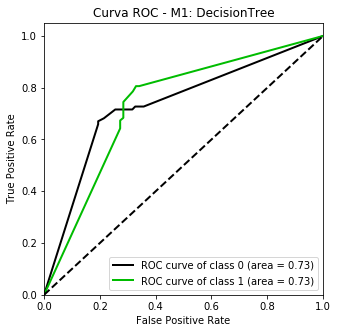

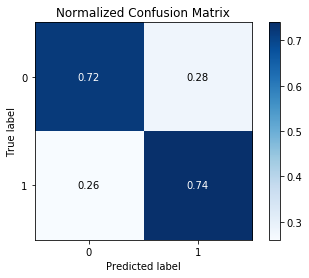

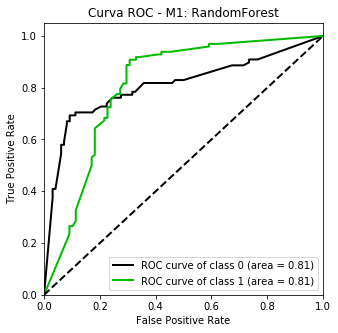

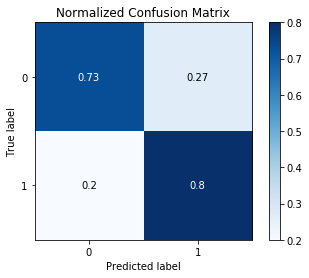

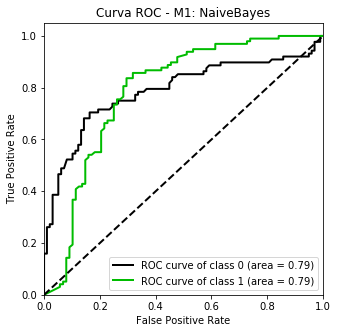

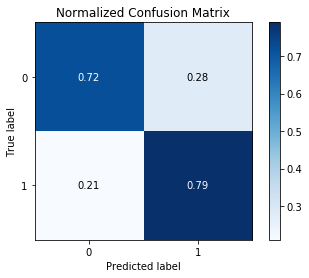

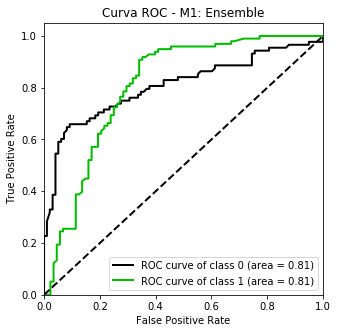

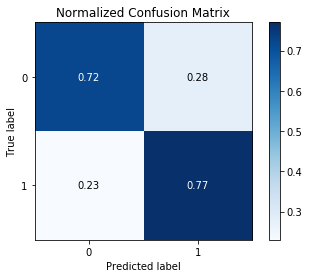

In [29]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 123)
clf_RF = RandomForestClassifier(criterion="entropy", random_state=123)
clf_NB = GaussianNB()

eclf = VotingClassifier(estimators=[('dt', clf_DT), ('rf', clf_RF), ('nb', clf_NB)], voting='soft', weights=[3,3,1])

for clf, label in zip([clf_DT, clf_RF, clf_NB, eclf], ['DecisionTree', 'RandomForest', 'NaiveBayes', 'Ensemble']):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print("\n", label)
    print("Acurácia : %.2f" % metrics.accuracy_score(y_test, y_pred))
    print("Recall   : %.2f" % metrics.recall_score(y_test, y_pred))
    print("Precision: %.2f" % metrics.precision_score(y_test, y_pred))
    print("F1 Score : %.2f" % metrics.f1_score(y_test, y_pred))
    print("-"*25)
    

    #  ------------------------------------ Curva ROC --------------------------------------------- #
    predict_proba = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, 
                       predict_proba, 
                       figsize=(5,5), 
                       title='Curva ROC - M1: ' + label,
                       plot_micro=False, 
                       plot_macro=False)

    plt.savefig("../5. Interpretacao/M1_CurvaROC_" + label + ".png", dpi=1000, transparent=True)
    
    #  -------------------------------------------------------------------------------------------- #
    
    
    #  ------------------------------ Matriz de Confusão ------------------------------------------ #
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    plt.savefig("../5. Interpretacao/M1_MatrizConfusao_" + label + ".png", dpi=1000, transparent=True)
    #  -------------------------------------------------------------------------------------------- #

---

## Curva ROC 

In [34]:
# Predict class probabilities
predict_proba = classifier.predict_proba(X_test)

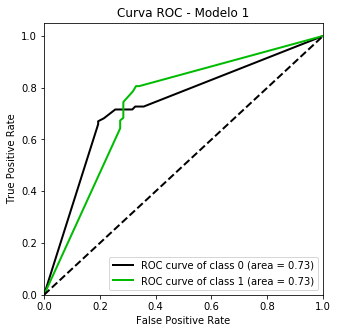

In [39]:
skplt.metrics.plot_roc(y_test, 
                       predict_proba, 
                       figsize=(5,5), 
                       title='Curva ROC - Modelo 1',
                       plot_micro=False, 
                       plot_macro=False)

plt.savefig("../5. Interpretacao/M1_CurvaROC.png", dpi=1000, transparent=True)

---

## Matriz de Confusão

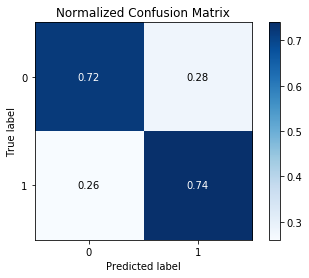

In [38]:

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig("../5. Interpretacao/M1_MatrizConfusao.png", dpi=1000, transparent=True)

----

## Gráfico da Árvore

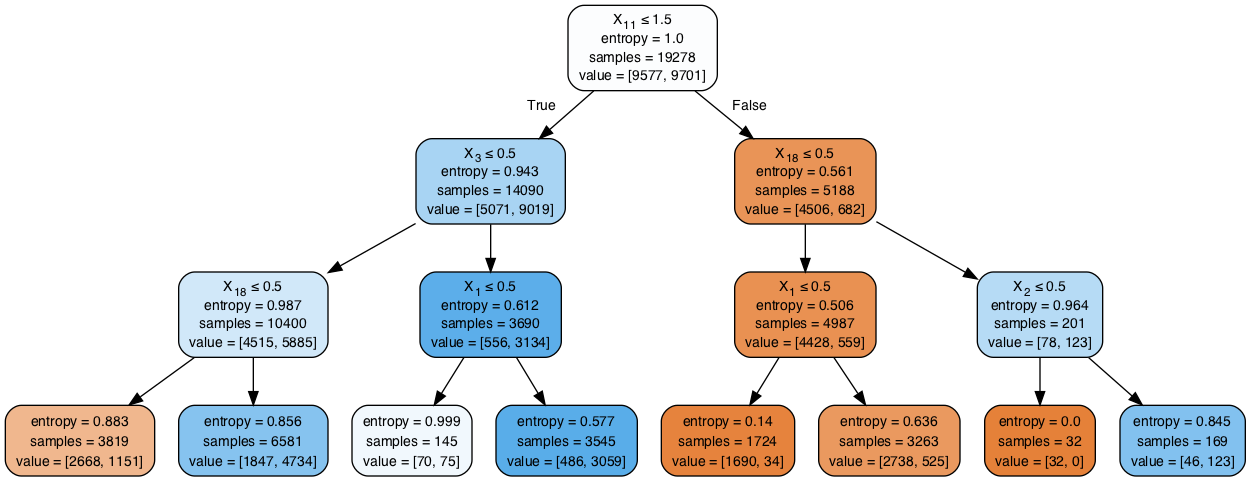

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
from sklearn import tree
dotfile = open("dt.dot", 'w')
tree.export_graphviz(classifier, out_file=dotfile, feature_names=list(df.iloc[:,0:30]), class_names=['NORMAL', 'GRAVE'], filled=True, proportion=False, rounded=True)
dotfile.close()

---

### Salvando modelo

In [115]:
import pickle
filename = "Modelos/M3_Undersampling_OneHot_Arvore.sav"
pickle.dump(classifier, open(filename, 'wb'))

---